In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
game= pd.read_csv('vgsales.csv')

In [4]:
game.shape

(16719, 16)

In [5]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
print("Data Set Size:", game.shape)
print("Number of Attributes:", len(game.columns))
print("Missing Values:", game.isnull().sum().sum())
print("Number of Observations:", len(game))

Data Set Size: (16719, 16)
Number of Attributes: 16
Missing Values: 46716
Number of Observations: 16719


In [7]:
game.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
game.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# We need to remove rows with missing values in 'Global_Sales' to ensure valid comparisons

In [10]:
game_clean = game.dropna(subset=['Global_Sales'])

In [ ]:
# Sort the DataFrame by 'Global_Sales' in descending order

In [11]:
game_sorted = game_clean.sort_values(by='Global_Sales', ascending=False)

In [ ]:
# To get the top 5 games by global sales

In [12]:
top_5_games = game_sorted[['Name', 'Global_Sales']].head(5)
print("Top 5 Games by Global Sales:")
print(top_5_games)

Top 5 Games by Global Sales:
                       Name  Global_Sales
0                Wii Sports         82.53
1         Super Mario Bros.         40.24
2            Mario Kart Wii         35.52
3         Wii Sports Resort         32.77
4  Pokemon Red/Pokemon Blue         31.37


In [ ]:
# NEW SECCTION

In [ ]:
# Now we filter the data between the years 2010 to 2014

In [13]:
game_filtered = game[(game['Year_of_Release'] >= 2010) & (game['Year_of_Release'] <= 2014)]

In [ ]:
# Removing rows with missing values in 'NA_Sales' or 'JP_Sales'

In [14]:
game_filtered_clean = game_filtered.dropna(subset=['NA_Sales', 'JP_Sales'])

In [ ]:
# We need to calculate the correlation between 'NA_Sales' and 'JP_Sales'

In [15]:
correlation = game_filtered_clean['NA_Sales'].corr(game_filtered_clean['JP_Sales'])
print(f"Correlation between NA_Sales and JP_Sales (2010-2014): {correlation:.2f}")

Correlation between NA_Sales and JP_Sales (2010-2014): 0.26


In [ ]:
# Optional: Visualize the correlation using a scatter plot

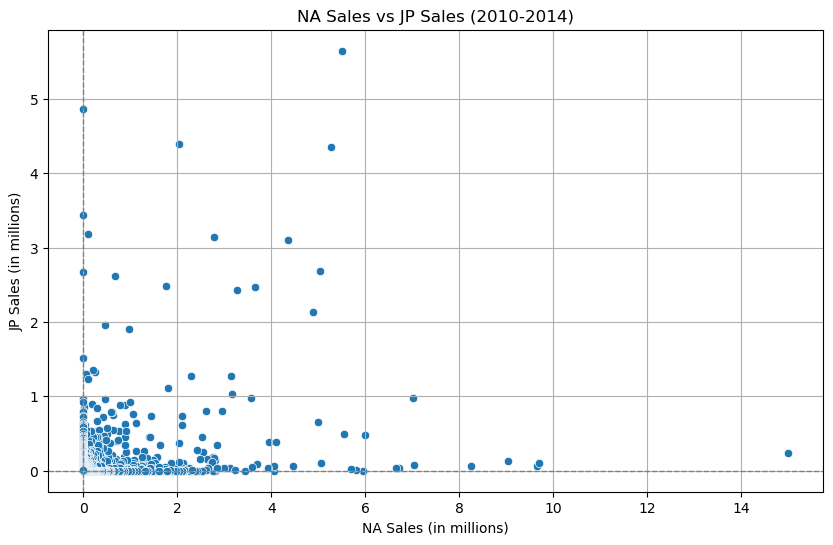

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=game_filtered_clean)
plt.title('NA Sales vs JP Sales (2010-2014)')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('JP Sales (in millions)')
plt.axhline(0, color='grey', lw=1, ls='--')
plt.axvline(0, color='grey', lw=1, ls='--')
plt.grid()
plt.show()

In [ ]:
# DISTRIBUTION OF THE MOST POPULAR 4 GAMES GENRES

In [ ]:
# Remove rows with missing values in 'Genre' or 'Global_Sales'

In [17]:
game_clean = game.dropna(subset=['Genre', 'Global_Sales'])

In [ ]:
# Group by 'Genre' and sum the 'Global_Sales' to find the total sales per genre

In [18]:
genre_sales = game_clean.groupby('Genre')['Global_Sales'].sum().reset_index()

In [ ]:
# Sort the genres by total sales in descending order

In [19]:
top_genres = genre_sales.sort_values(by='Global_Sales', ascending=False).head(4)

In [20]:
# Display the top genres
print("Top 4 Game Genres by Global Sales:")
print(top_genres)

Top 4 Game Genres by Global Sales:
           Genre  Global_Sales
0         Action       1745.27
10        Sports       1332.00
8        Shooter       1052.94
7   Role-Playing        934.40


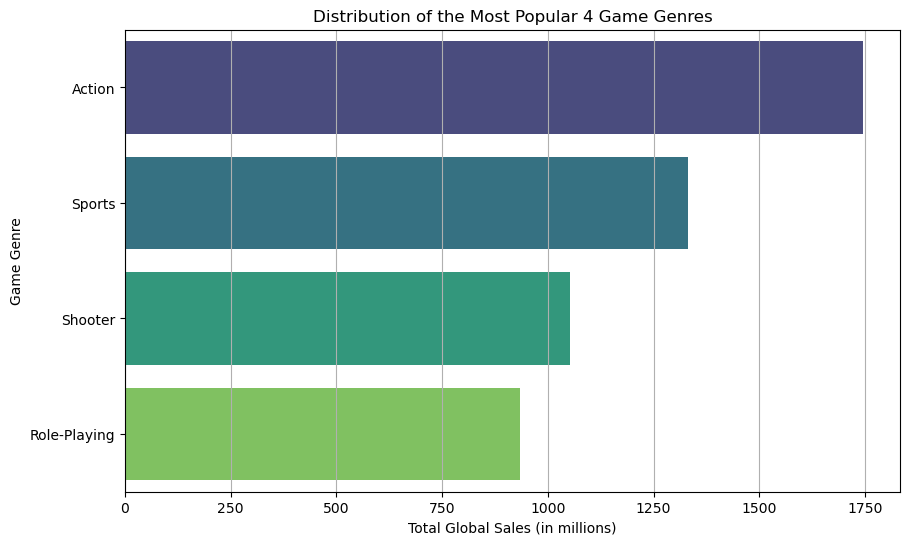

In [21]:
# Visualize the distribution of the top 4 game genres
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Genre', data=top_genres, palette='viridis')
plt.title('Distribution of the Most Popular 4 Game Genres')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Game Genre')
plt.grid(axis='x')
plt.show()

In [ ]:
# Higher mean EU sales

In [ ]:
# Remove rows with missing values in 'Year_of_Release' or 'EU_Sales'

In [22]:
game_clean = game.dropna(subset=['Year_of_Release', 'EU_Sales'])

In [ ]:
# Convert 'Year_of_Release' to numeric, errors='coerce' will convert invalid parsing to NaN

In [23]:
game_clean['Year_of_Release'] = pd.to_numeric(game_clean['Year_of_Release'], errors='coerce')

C:\Users\eroja\AppData\Local\Temp\ipykernel_53536\263669568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clean['Year_of_Release'] = pd.to_numeric(game_clean['Year_of_Release'], errors='coerce')


In [ ]:
# Filter the data into older and newer games

In [24]:
older_games = game_clean[game_clean['Year_of_Release'] <= 2005]
newer_games = game_clean[game_clean['Year_of_Release'] > 2005]

In [ ]:
# Calculate the mean EU_Sales for both groups

In [25]:
mean_eu_sales_older = older_games['EU_Sales'].mean()
mean_eu_sales_newer = newer_games['EU_Sales'].mean()

In [ ]:
# Display the results

In [26]:
print(f"Mean EU Sales for Older Games (2005 and earlier): {mean_eu_sales_older:.2f} million")
print(f"Mean EU Sales for Newer Games (after 2005): {mean_eu_sales_newer:.2f} million")

Mean EU Sales for Older Games (2005 and earlier): 0.15 million
Mean EU Sales for Newer Games (after 2005): 0.14 million


In [ ]:
# Comparison

In [27]:
if mean_eu_sales_older > mean_eu_sales_newer:
    print("Older games have a higher mean EU Sales than newer games.")
elif mean_eu_sales_older < mean_eu_sales_newer:
    print("Newer games have a higher mean EU Sales than older games.")
else:
    print("Both older and newer games have the same mean EU Sales.")

Older games have a higher mean EU Sales than newer games.


In [ ]:
# Removing rows with missing values in 'Developer'

In [28]:
game_clean = game.dropna(subset=['Developer'])

In [ ]:
# Count occurrences of each developer

In [29]:
developer_counts = game_clean['Developer'].value_counts()

In [ ]:
# Get the top 3 most common developers

In [30]:
top_3_developers = developer_counts.head(3)

In [ ]:
# Display the results

In [31]:
print("Top 3 Most Common Developers:")
print(top_3_developers)

Top 3 Most Common Developers:
Developer
Ubisoft      204
EA Sports    172
EA Canada    167
Name: count, dtype: int64


In [ ]:
# Relation between critical score and global sales

In [ ]:
# Removing rows with missing values in 'Global_Sales' or 'Critic_Score'

In [32]:
game_clean = game.dropna(subset=['Global_Sales', 'Critic_Score'])

In [ ]:
# Convert 'Critic_Score' to numeric for analysis

In [33]:
game_clean['Critic_Score'] = pd.to_numeric(game_clean['Critic_Score'], errors='coerce')

C:\Users\eroja\AppData\Local\Temp\ipykernel_53536\3894361012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_clean['Critic_Score'] = pd.to_numeric(game_clean['Critic_Score'], errors='coerce')


In [ ]:
# Calculate the correlation between Critic Score and Global Sales

In [34]:
correlation = game_clean['Critic_Score'].corr(game_clean['Global_Sales'])

In [ ]:
# Display the correlation result

In [35]:
print(f"Correlation between Critic Score and Global Sales: {correlation:.2f}")

Correlation between Critic Score and Global Sales: 0.25


In [ ]:
# Visualize the relationship using a scatter plot

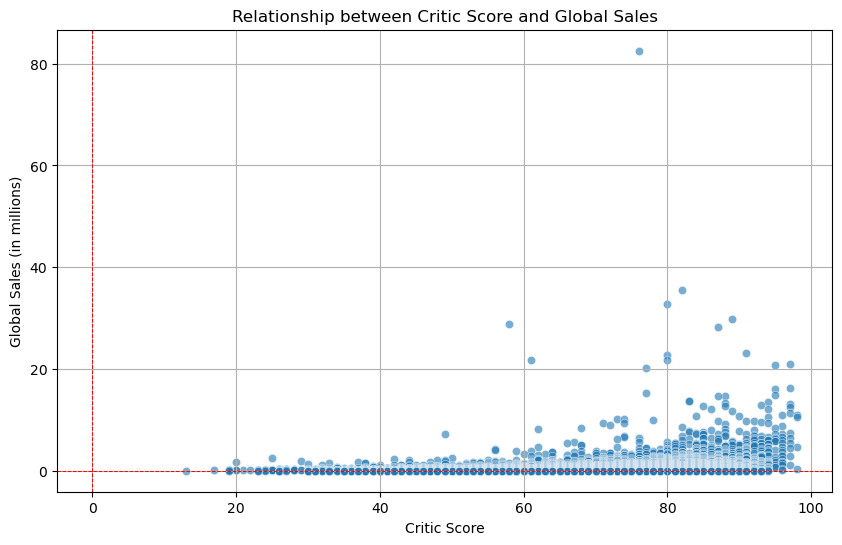

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=game_clean, x='Critic_Score', y='Global_Sales', alpha=0.6)
plt.title('Relationship between Critic Score and Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--', linewidth=0.7)  # Add a horizontal line at y=0
plt.axvline(x=0, color='r', linestyle='--', linewidth=0.7)  # Add a vertical line at x=0
plt.show()